# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

The used car market has gained dominance over the regular brand-new car market. It has come to the point where people upgrade their vehicle choice, not a brand new car, but a used one. 

### **The objective:**


 The goal is to be able to predict the price of second hand cars thar are being sold in India.

### **The key questions:**

The most important thing is to know which factors come into play into determing a price and how much weight each one of those features has.

### **The problem formulation**:

We are trying to solve uncertainty of the market and the price determined of each car, specially for sellers who do not know how to price some cars.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

#usefull libraries 
import missingno as msno
# Import library for preparing data
from sklearn.model_selection import train_test_split

### **Let us load the data**

In [3]:
data = pd.read_csv("used_cars.csv")

## Data Overview

Let's check that the data loaded correctly:

In [4]:
display(data.head())
display(data.info())

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


None

We can see that there are 14 columns and 7253 rows in the data. `Mileage`, `Engine`, `Power`, `Seats`, `New_Price` and `Price` all have null values. We can also see that the type of each column is correct, since the non-numeric ones are of "object" kind.

Let's see the count of NaN for each variable:

In [5]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

We can see that `New_price` is missing most of the time. This is probably going to mean that it won't be used for our analysis. `Price` also has a large count of missing data, this rows can't be used for training, since the data is not labeled.

Since index is only to keep track of each observation, we should drop it as it has no use for our purpouse:

In [6]:
#Let's drop the index since it is of no use 
data.drop('S.No.',inplace=True,axis=1)

## **Exploratory Data Analysis**

In [7]:

data.describe() #Let's see the metrics description

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


We can see that the mean price is way higher than the median, which let us know of outliers. We can also see a great deal of missing values.

In [8]:
data.describe(include = ['object'] ) #Let's do description for object types

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


we can see there are 11 unique location, most often Mumbai, two types of transmission and 4 types of owners.

Lets explore unique values in each category:

In [9]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].unique)
    
    print('-'*50)

For column: Name
<bound method Series.unique of 0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7253, dtype: object>
--------------------------------------------------
For column: Location
<bound method Series.unique of 0           Mumbai
1             Pune
2          Chennai
3          Chennai
4       Coimbatore
           ...    
7248     Hyderabad
7249        Mumbai
7250       Kolkata

In [10]:
# Sorting the dataset in descending order by kilometers dirven
data.sort_values('Kilometers_Driven',ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


We see that the top value is way larger than the rest. A car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.


In [11]:
#Let's drop that value since it is probably a mistake
data.drop(2328,inplace=True)

Let's now check mileage for extreme values too:

In [12]:
# Sorting the dataset in ascending order by mileage
data.sort_values('Mileage').head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

## I. Numerical features

Let's first deefine a function in order to visualize each numerical feature in a more efficient way

In [13]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

Let's now plot each numerical feature using the function we just defined:

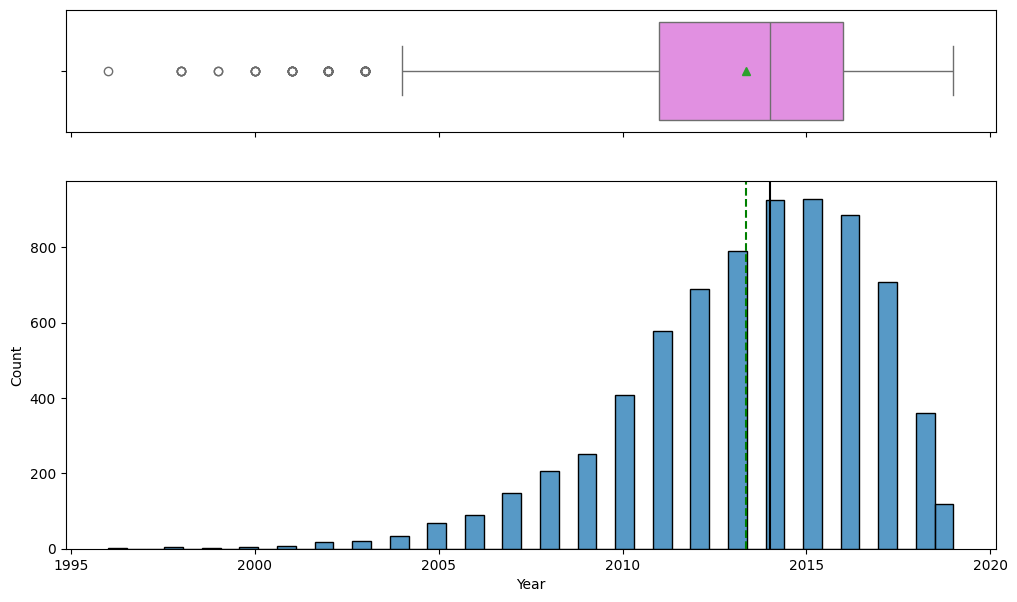

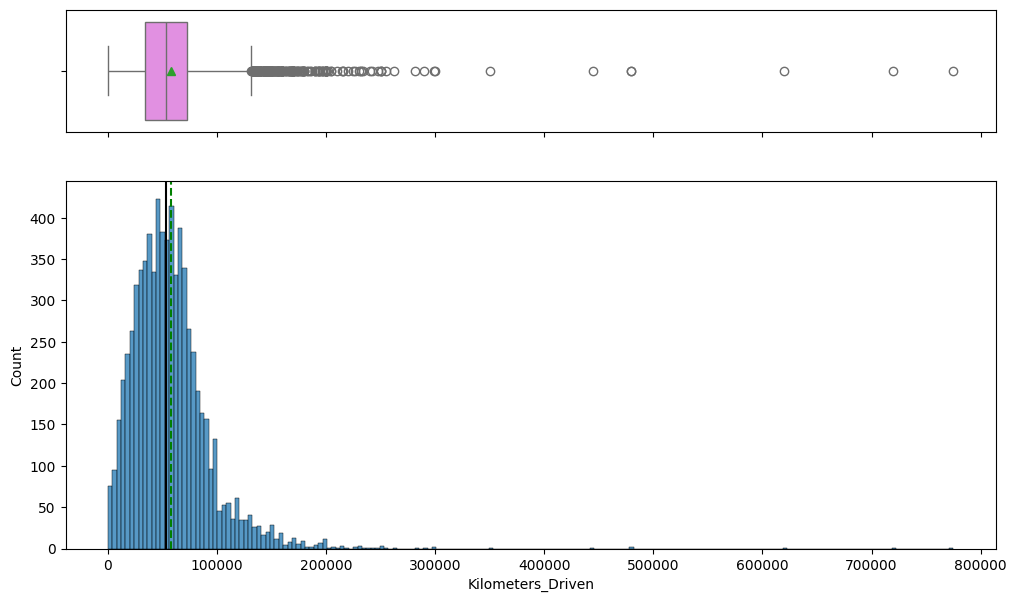

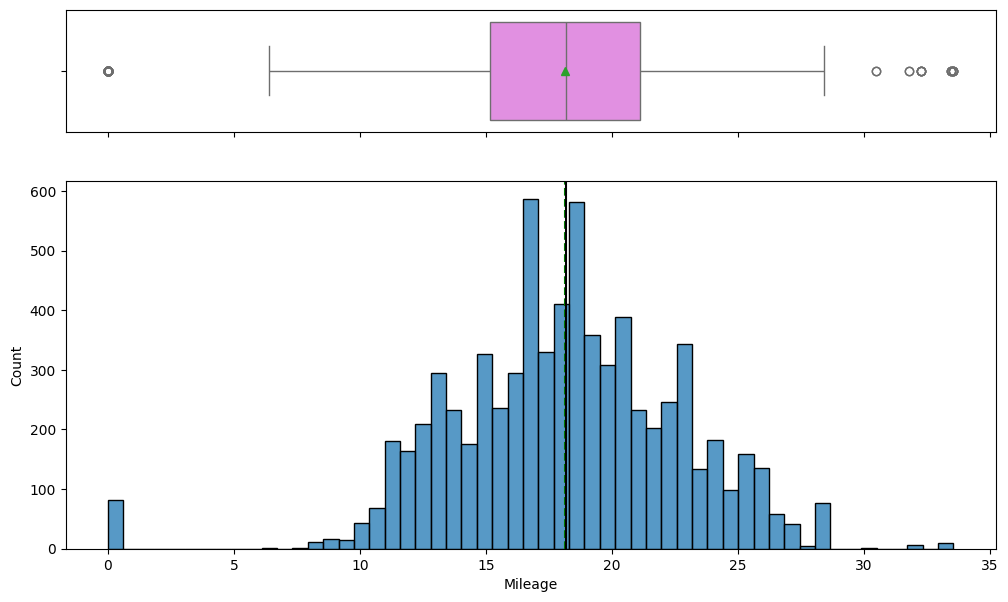

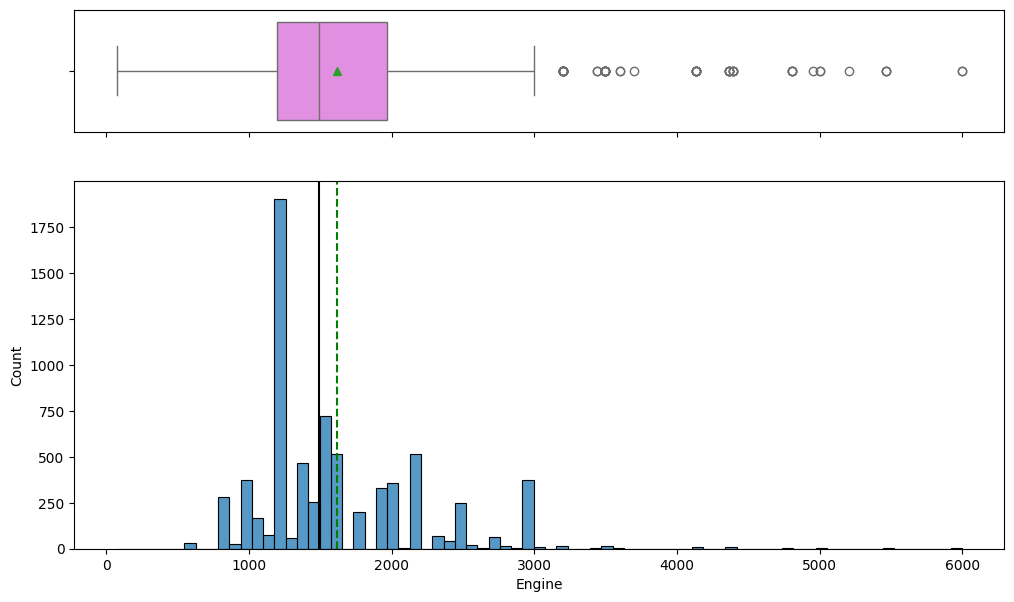

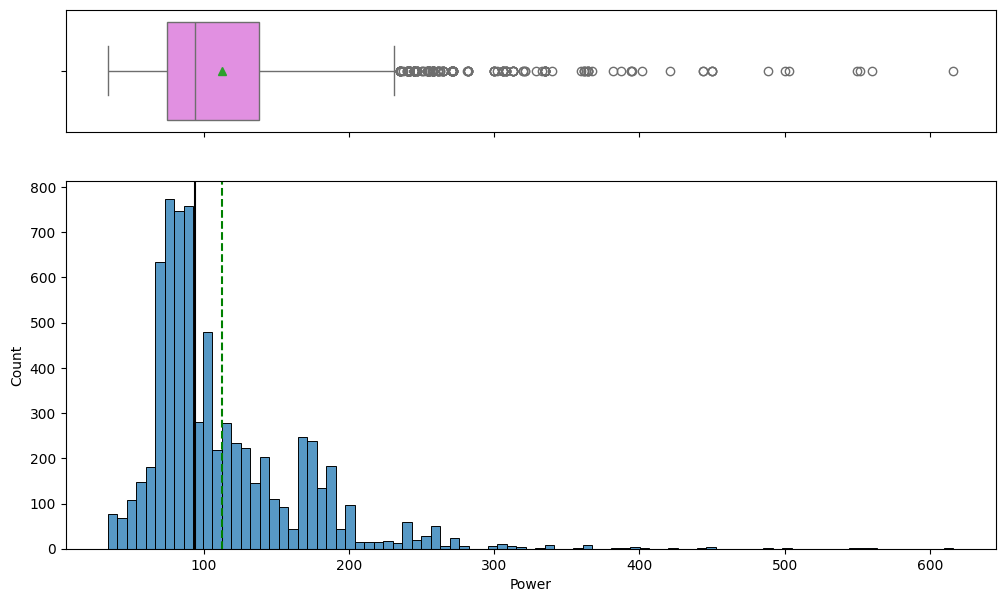

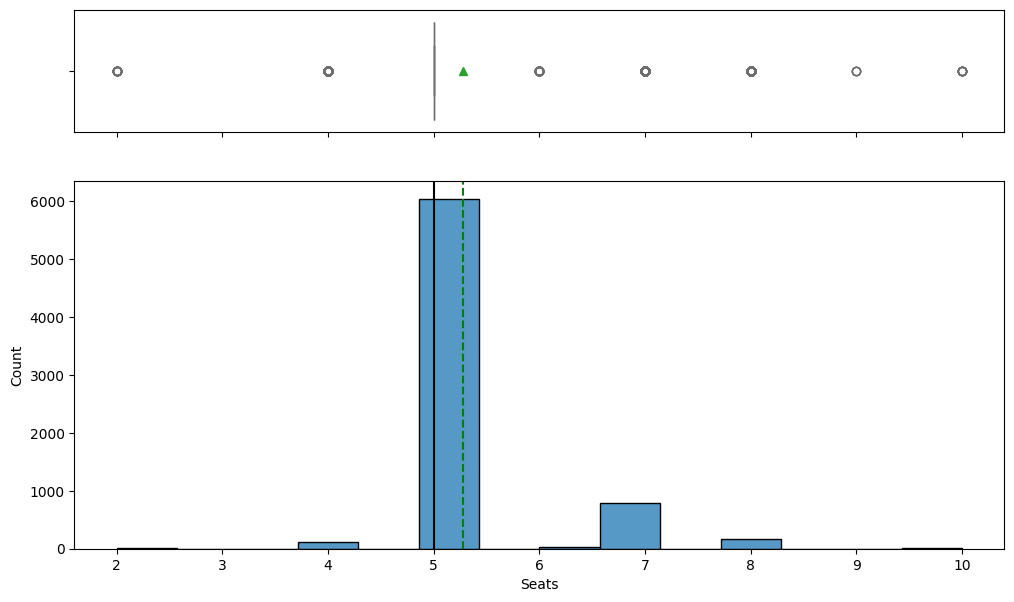

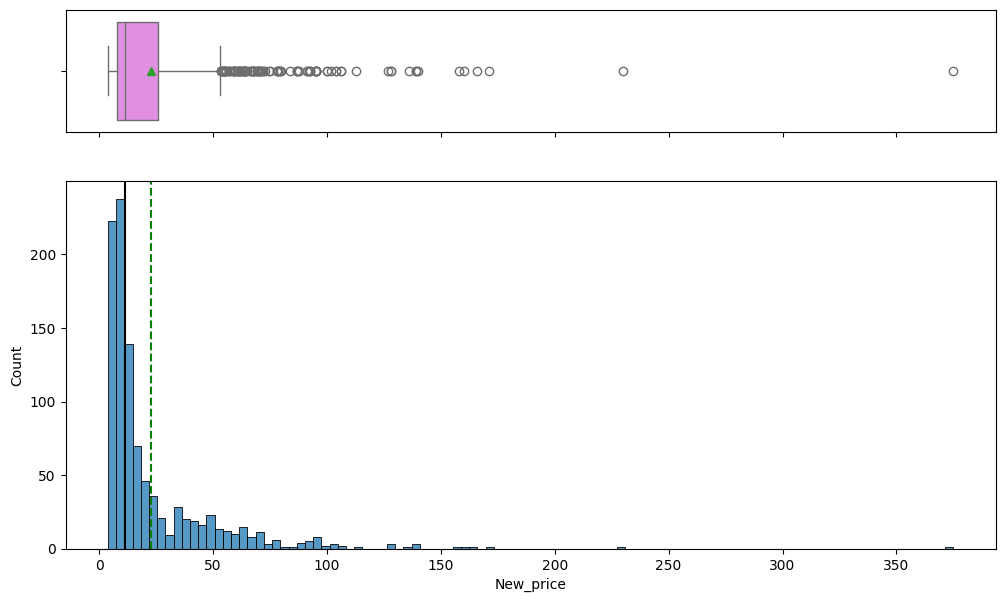

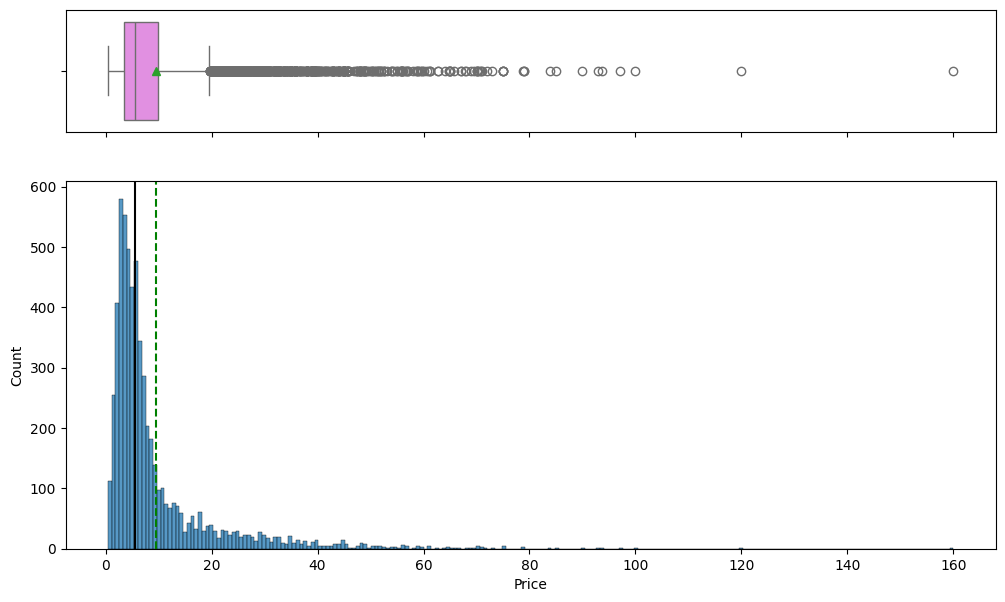

In [14]:
# Create list with numeric variables
num_cols = data.select_dtypes(include = ['int64','float64']).columns

# Graph each one of them
for col in num_cols:
    histogram_boxplot(data, col)


We can see that `Kilometers_Driven`, `Power`, `New_Price` and `Price` are highly skewed. We can use a log transformation on these variables to have a better undertanding of the distribution, which can also be helpful while creating a model.

<Axes: xlabel='Log(Kilometers_Driven)', ylabel='Density'>

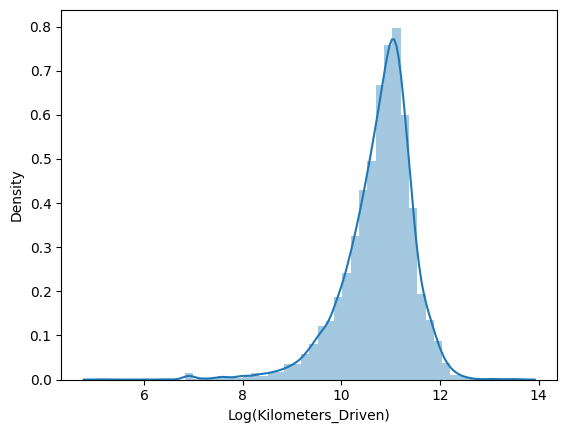

In [395]:
# Log transformation of the features
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)")


<Axes: xlabel='Log(Power)', ylabel='Density'>

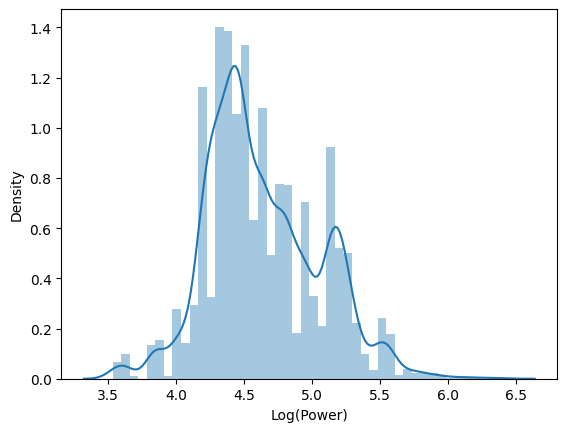

In [15]:
sns.distplot(np.log(data["Power"]), axlabel = "Log(Power)")


<Axes: xlabel='Log(New_price)', ylabel='Density'>

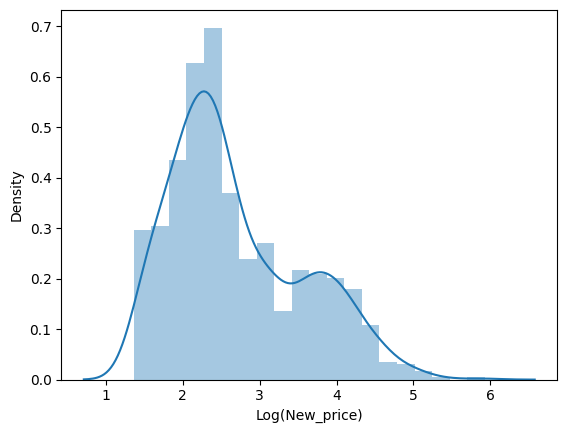

In [16]:
sns.distplot(np.log(data["New_price"]), axlabel = "Log(New_price)")


<Axes: xlabel='Log(Price)', ylabel='Density'>

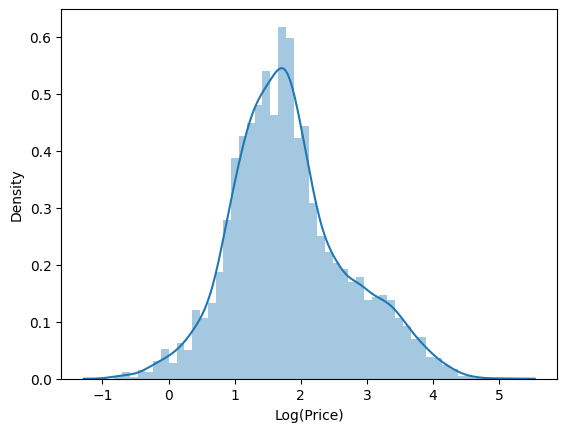

In [398]:
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)")

We can see that once we apply the log transformation to `Price` and `Kilometers_Driven` they resemble a normal distribution. This could be useful for our model so we shore store these transformations in the data set.

In [399]:
# We can add a transformed kilometers_driven  and price feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])
data["Price_log"] = np.log(data["Price"])

## II. Categorical features

Let's define a function that will help us visualize the categorical features. Then we will plot each category using the function

In [17]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(data, z):
    '''
    plot
    data: DataFrame or Series
    z: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])  # Length of the column
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(data=data, x=z, palette='Paired', order=data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Width of the plot
        y = p.get_y() + p.get_height()  # Height of the plot

        ax.annotate(percentage, (x, y), size=12, ha='center')  # Annotate the percentage with center alignment

    plt.show()

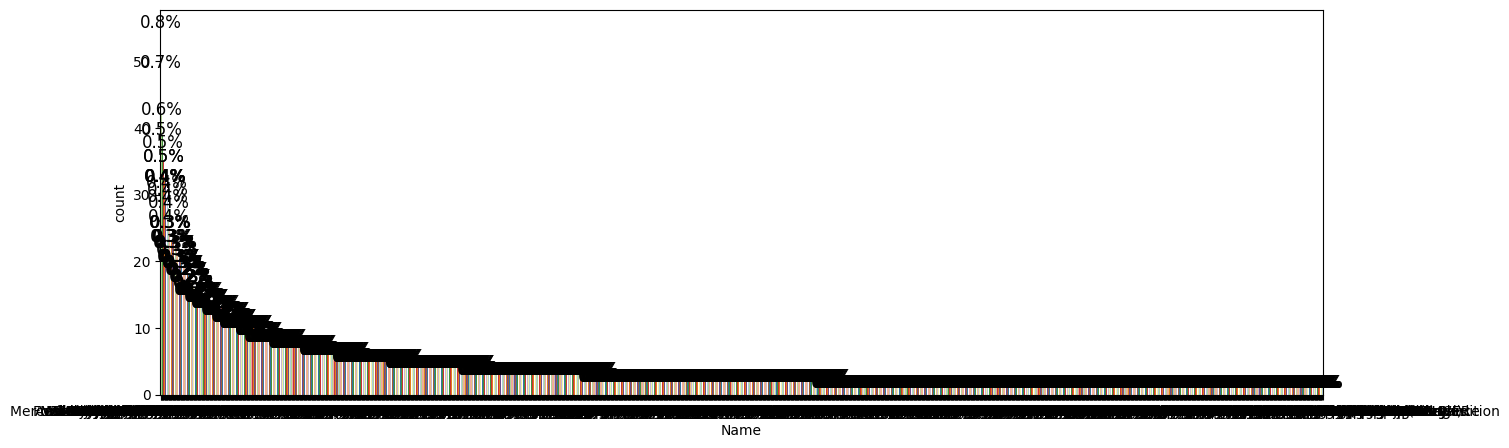

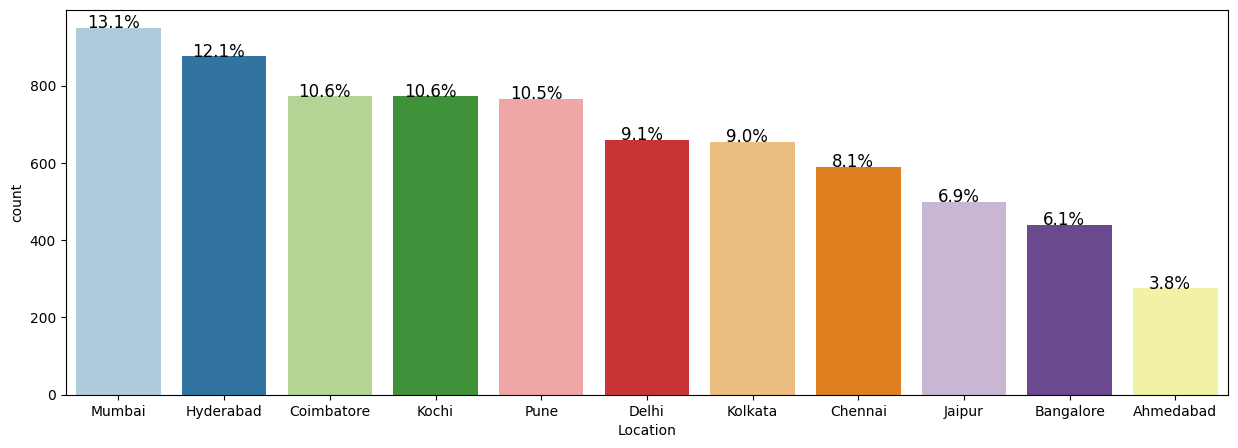

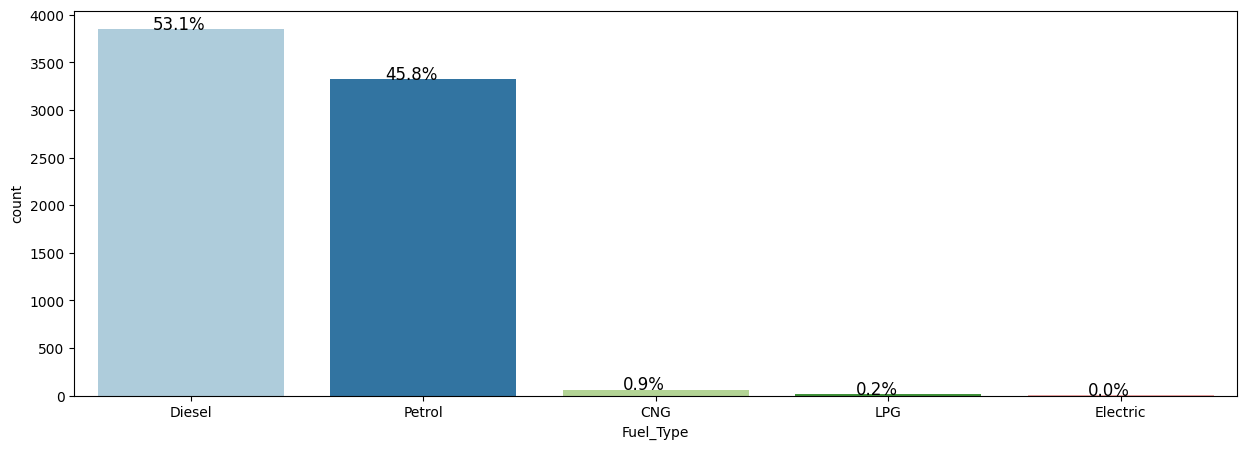

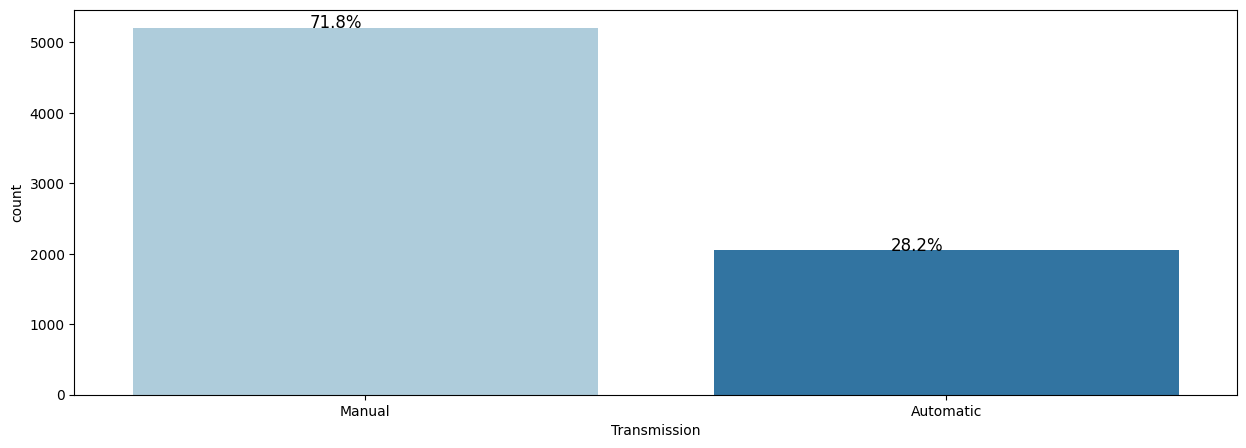

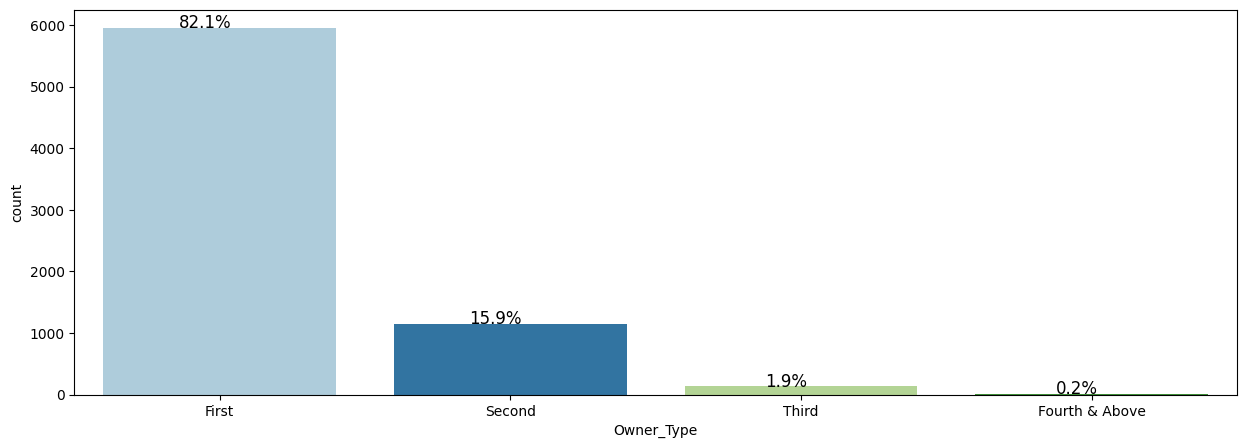

In [18]:

for col in cat_cols:
    perc_on_bar(data,col)


We can observa that `Name` is not interpretable. For the others, `Location` shows us that most sells are in Mumbai, followed prettty evenly for others. Most `Fuel_Type` is either Diesel or Petrol, so these are the most useful categories. We can see that most cars are Manual and are a First Purchase.

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

Let's plot a regplot using the objective variable in the Y axis:

In [402]:
#Adding the log transformation into numeric columns list 
num_cols_log = data.select_dtypes(include = ['int64','float64']).columns

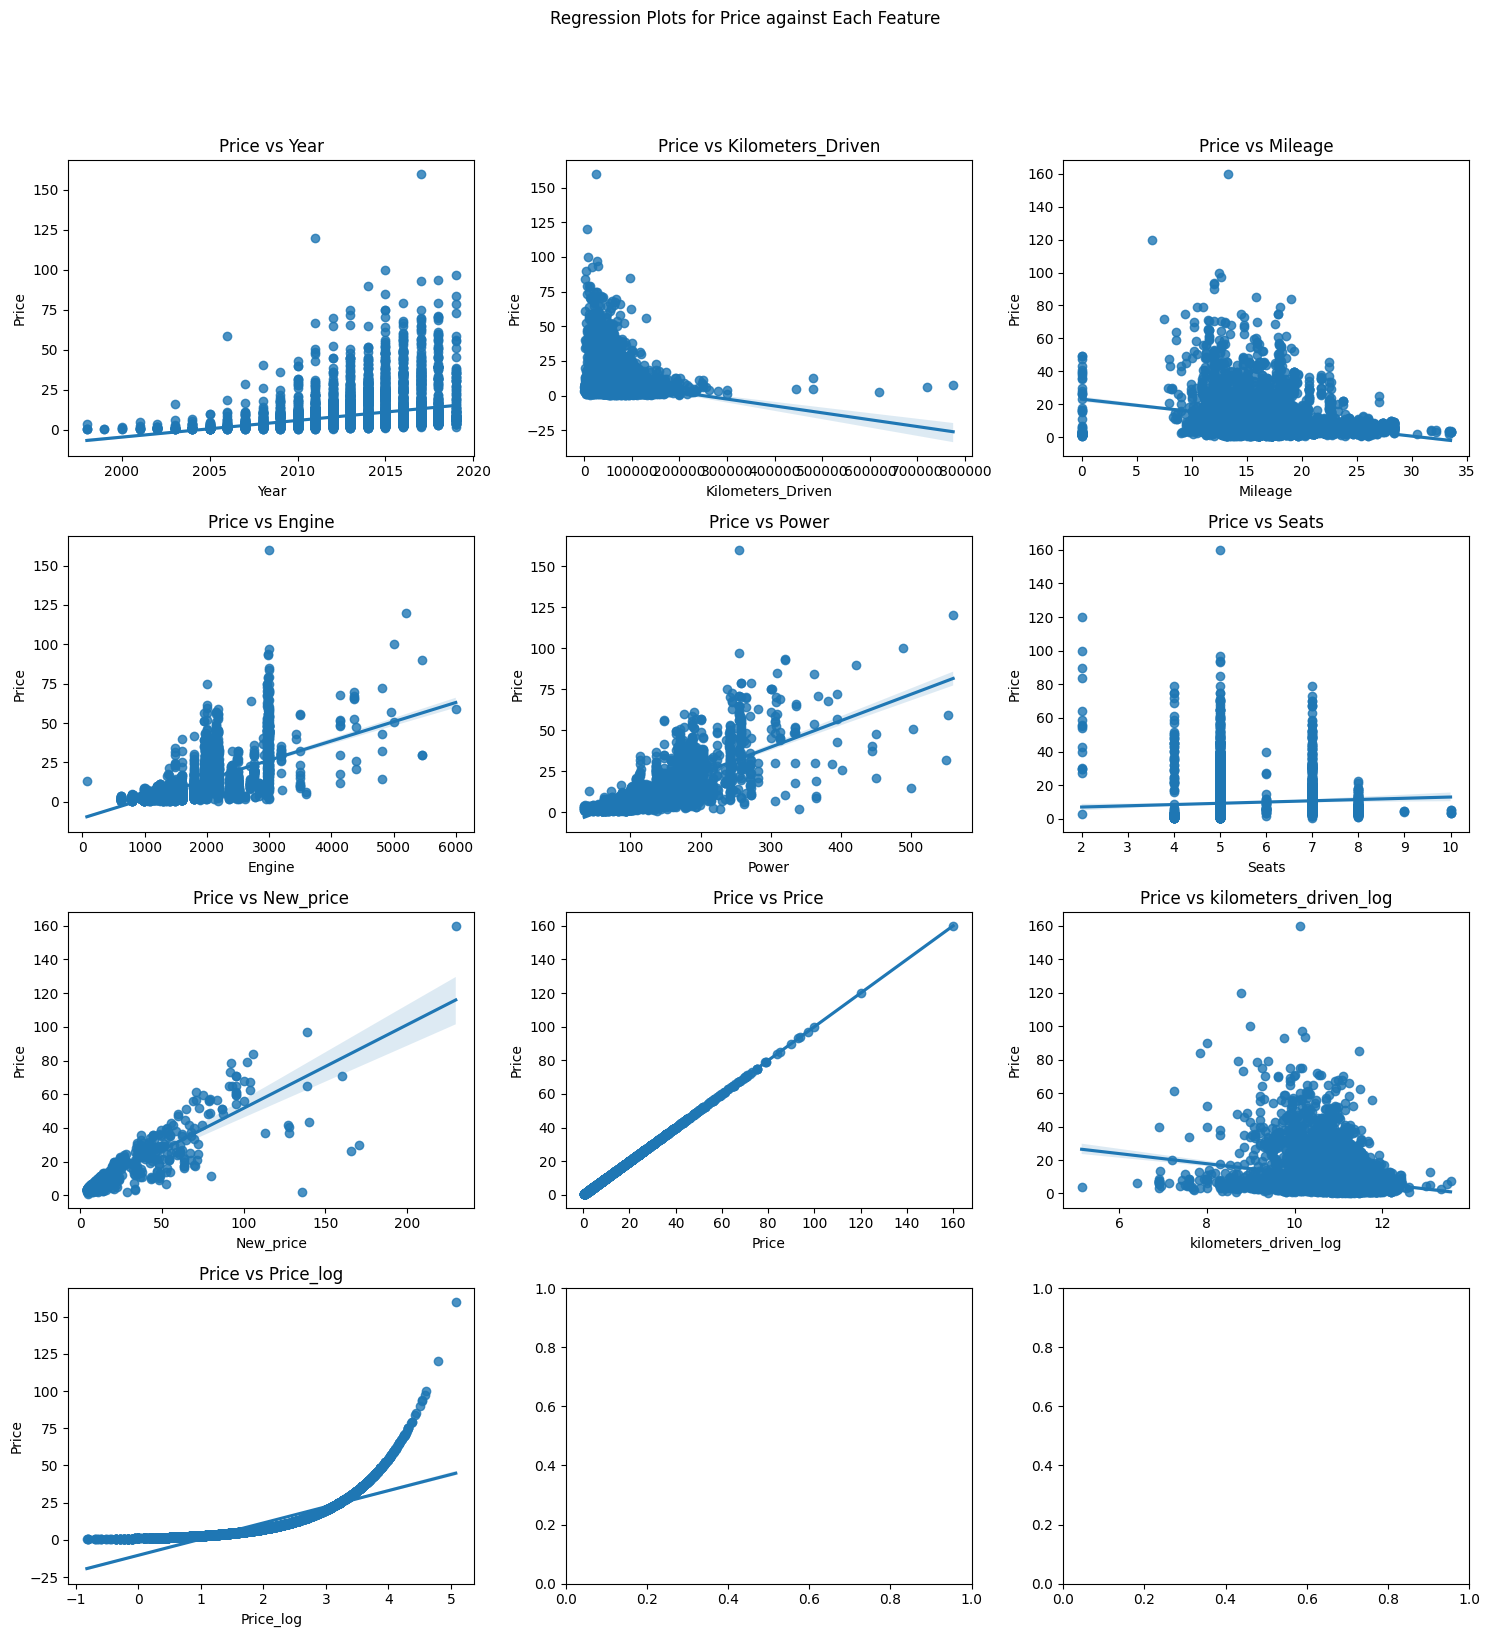

In [403]:
#Let's create a regplot for the non transformed objective variable :

# Get the list of column names excluding the 'y_variable'
x_variables = [col for col in num_cols_log if col != ['Price' or 'Price_log']]

# Set up the grid of subplots
num_plots = len(x_variables)
num_cols = 3  # Number of columns in the subplot grid
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.suptitle(f'Regression Plots for Price against Each Feature', y=1.02)

# Iterate over each column and create a regplot
for i, col in enumerate(x_variables):
    row_num = i // num_cols
    col_num = i % num_cols

    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]

    sns.regplot(x=col, y='Price', data=data, ax=ax)
    ax.set_title(f'Price vs {col}')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plots
plt.show()

This grid shows us all the relationships between the `Price` and the features. Because `Price` is highly skewed, the interpretations become difficult. let's do the same with the transformed objective variable:

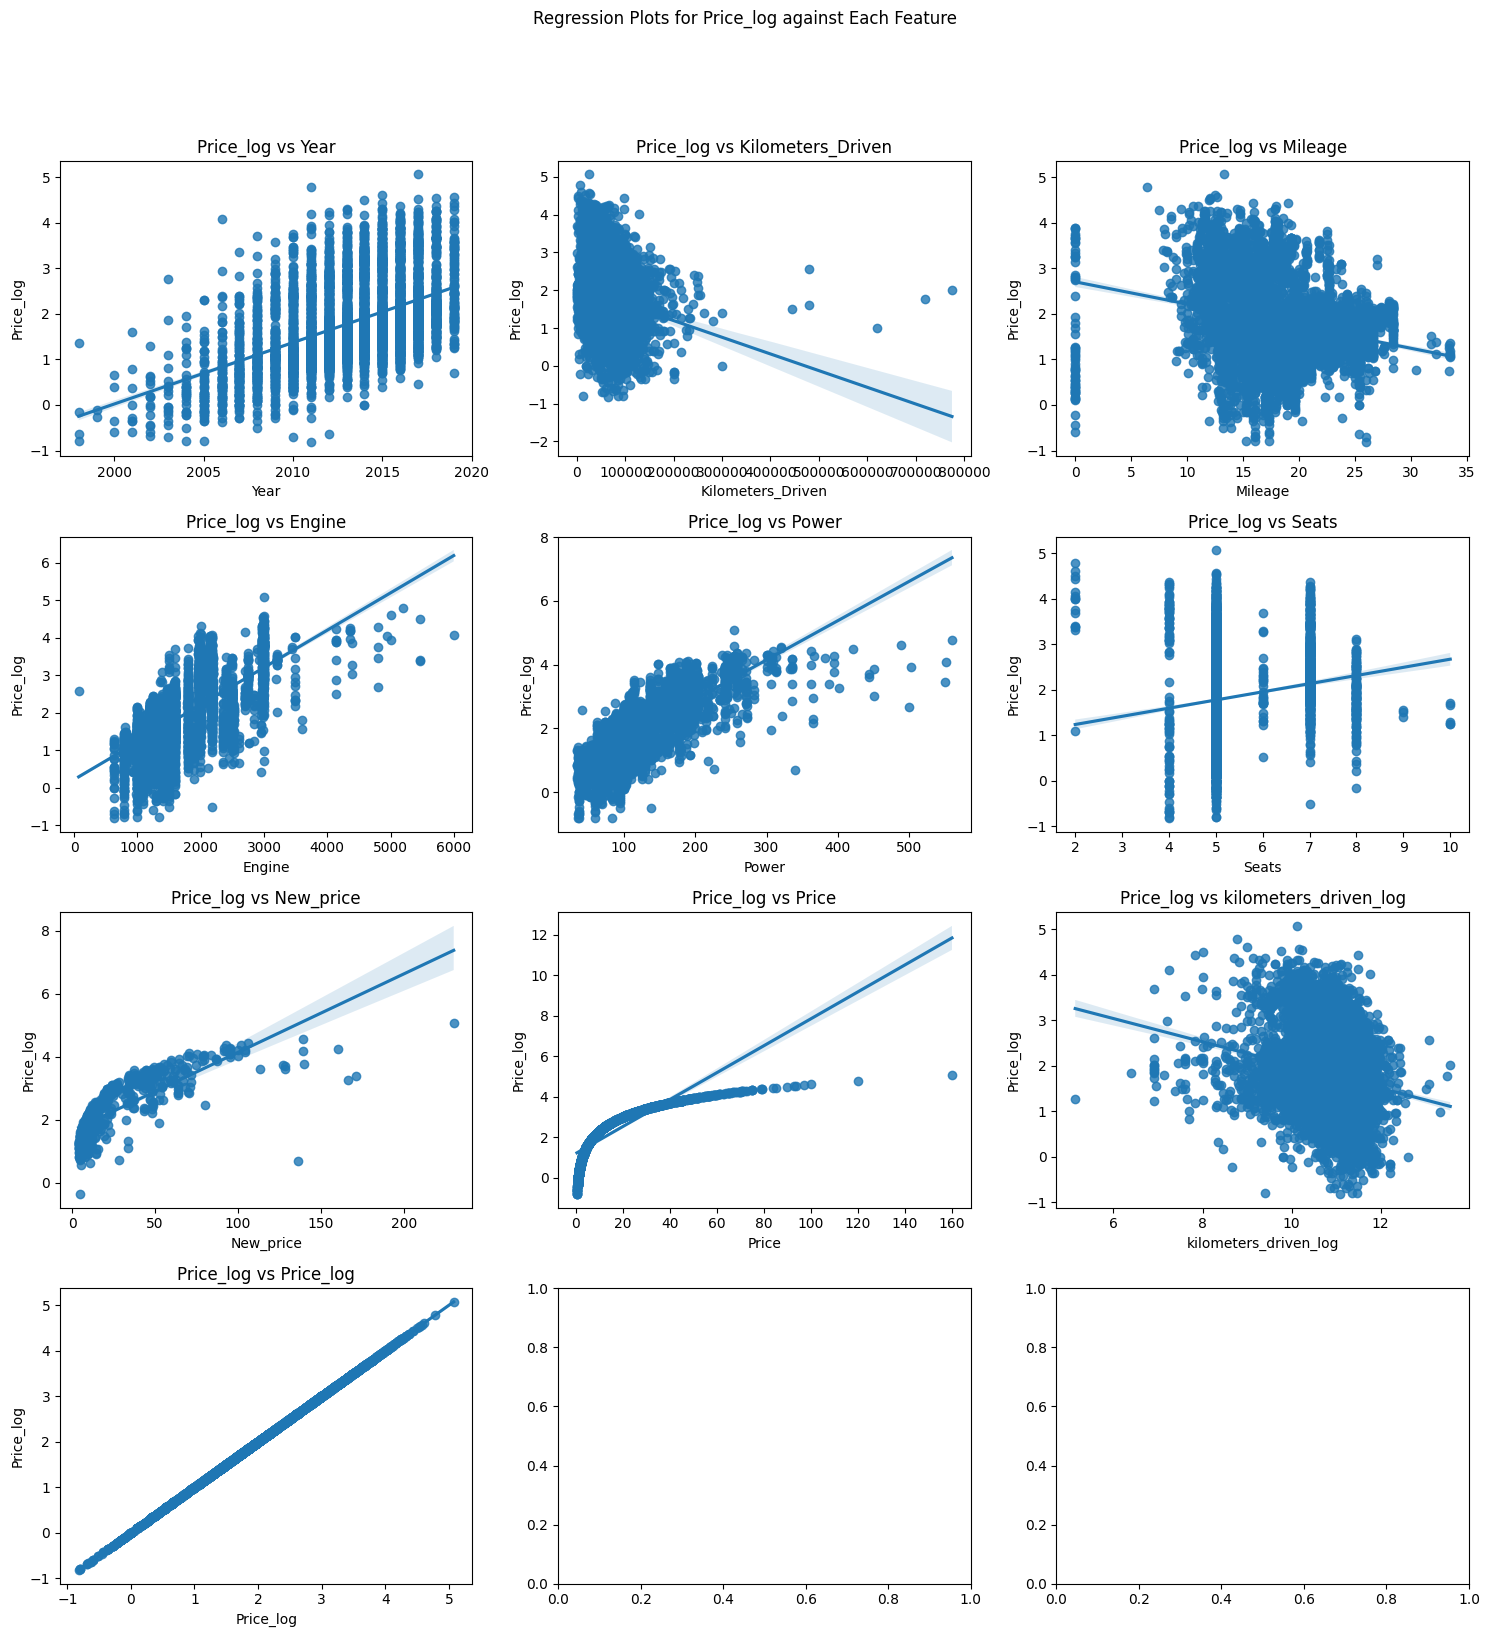

In [404]:
#Same code using Price_log

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.suptitle(f'Regression Plots for Price_log against Each Feature', y=1.02)

# Iterate over each column and create a regplot
for i, col in enumerate(x_variables):
    row_num = i // num_cols
    col_num = i % num_cols

    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]

    sns.regplot(x=col, y='Price_log', data=data, ax=ax)
    ax.set_title(f'Price_log vs {col}')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plots
plt.show()

Now we can see some really interesting stuff. For example, the outliers for kilometers driven is making it hard ti understand the relationship between the two variables, we could eliminate the outluers and graph again. `Power` and `Engine` seem to have a logaritmic realtionship with `Price_log`, we can use that for our model.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [405]:
#Let's extract the brand
data["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0].lower())

data['Brand'].head(20)

0            maruti
1           hyundai
2             honda
3            maruti
4              audi
5           hyundai
6            nissan
7            toyota
8        volkswagen
9              tata
10           maruti
11            honda
12           maruti
13             land
14             land
15       mitsubishi
16            honda
17           maruti
18          renault
19    mercedes-benz
Name: Brand, dtype: object

In [406]:
#Now the model
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1])
data['Model'].head()

0     Wagon
1     Creta
2      Jazz
3    Ertiga
4        A4
Name: Model, dtype: object

### **Missing value treatment**

In [407]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brand                       0
Model                       0
dtype: int64

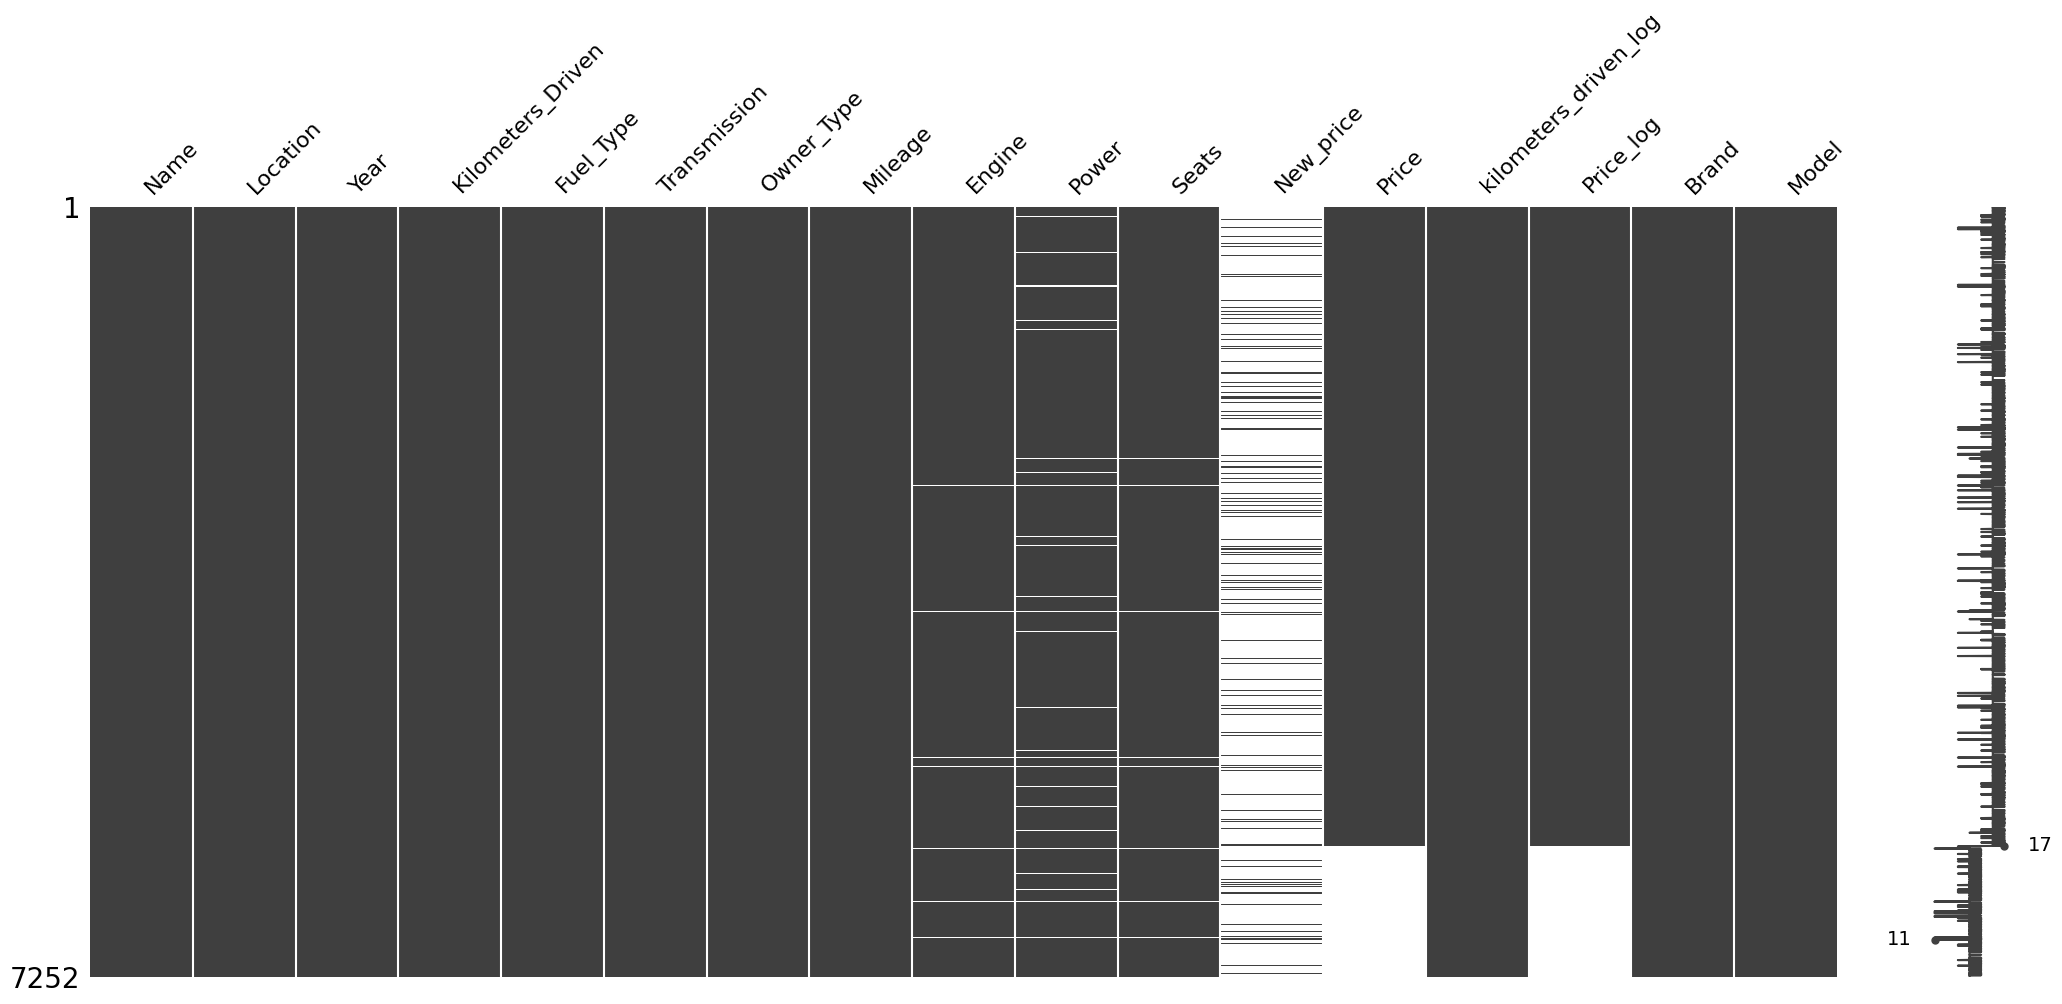

In [408]:
#let's visualize the missing data
msno.matrix(data)
plt.show()

Let's study these features deeply. We do not have to study `New_price` due to its high number of missing values. Also we are gonna drop the rows that have a missing objective variable.

In [409]:
#Get columns with missing data 
columns_with_missing_values = data.columns[data.isnull().any()].tolist()
print(columns_with_missing_values)

['Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Price', 'Price_log']


In [410]:
#Let's turn those zeros into missing data as we mentionted:

data.loc[data['Mileage'] == 0, 'Mileage'] = pd.NA


In [411]:
#Isolate each feature
#mileage
mileage_missing = data[data['Mileage'].isna()]
mileage_complete = data[~data['Mileage'].isna()]


In [412]:
#Engine
Engine_missing = data[data['Engine'].isna()]
Engine_complete = data[~data['Engine'].isna()]

In [413]:
#Power
Power_missing = data[data['Power'].isna()]
Power_complete = data[~data['Power'].isna()]

In [414]:
#Seats
Seats_missing = data[data['Seats'].isna()]
Seats_complete = data[~data['Seats'].isna()]

In [415]:
#Seats
Seats_missing = data[data['Seats'].isna()]
Seats_complete = data[~data['Seats'].isna()]

Let's display the results:

### 1. Mileage

In [416]:
display(mileage_missing.describe())
display(mileage_complete.describe())

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
count,83.000000,83.000000,0.0,71.000000,38.000000,69.000000,5.000000,70.000000,83.000000,70.000000
mean,2009.469880,69933.771084,NaN,1689.845070,129.124474,5.101449,42.722000,11.422429,10.961257,1.556998
std,4.696489,42273.754988,NaN,823.028634,60.712234,0.807045,16.343323,14.693936,0.690107,1.348312
min,2001.000000,4000.000000,NaN,72.000000,41.000000,2.000000,13.580000,0.550000,8.294050,-0.597837
25%,2006.000000,44750.000000,NaN,1086.000000,62.000000,5.000000,49.140000,1.532500,10.708706,0.426583
50%,2009.000000,65000.000000,NaN,1086.000000,115.000000,5.000000,49.140000,2.975000,11.082143,1.090209
75%,2012.000000,85000.000000,NaN,2179.000000,165.000000,5.000000,49.490000,16.687500,11.350407,2.814639
max,2019.000000,227000.000000,NaN,3597.000000,262.600000,10.000000,52.260000,49.240000,12.332705,3.896706


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
count,7169.00000,7169.000000,7169.000000,7135.000000,7039.000000,7130.000000,1001.000000,5948.000000,7169.000000,5948.000000
mean,2013.40996,57670.498256,18.346859,1615.651437,112.656266,5.282188,22.680080,9.447268,10.757972,1.827855
std,3.20679,37421.025489,4.158106,592.430963,53.418961,0.809212,27.773499,11.117326,0.714024,0.866155
min,1996.00000,171.000000,6.400000,624.000000,34.200000,2.000000,3.910000,0.440000,5.141664,-0.820981
25%,2012.00000,34000.000000,15.300000,1198.000000,75.000000,5.000000,7.880000,3.500000,10.434116,1.252763
50%,2014.00000,53190.000000,18.200000,1493.000000,94.000000,5.000000,11.480000,5.650000,10.881626,1.731656
75%,2016.00000,73000.000000,21.100000,1968.000000,138.100000,5.000000,25.520000,9.900000,11.198215,2.292535
max,2019.00000,775000.000000,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000,13.560618,5.075174


Since it's only two observation we can input the mean  to fill those spots up:

In [417]:
data['Mileage'] = data['Mileage'].fillna(mileage_complete['Mileage'].mean())

In [418]:
#Let's check the missing data of Mileage 
data['Mileage'].isna().sum()

0

### 2. Engine

In [419]:
display(Engine_missing.describe())
display(Engine_complete.describe())

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
count,46.000000,46.000000,34.000000,0.0,0.0,0.0,0.0,36.000000,46.000000,36.000000
mean,2009.695652,68973.108696,16.763235,NaN,NaN,NaN,NaN,6.688333,11.027544,1.354182
std,3.840541,34385.631732,2.132255,NaN,NaN,NaN,NaN,8.525289,0.491337,0.993566
min,2001.000000,17941.000000,12.000000,NaN,NaN,NaN,NaN,0.700000,9.794844,-0.356675
25%,2007.250000,50721.250000,16.100000,NaN,NaN,NaN,NaN,1.825000,10.833995,0.601293
50%,2010.000000,63579.000000,16.100000,NaN,NaN,NaN,NaN,3.150000,11.059997,1.147402
75%,2012.000000,80750.000000,18.435000,NaN,NaN,NaN,NaN,6.975000,11.299099,1.906237
max,2017.000000,200000.000000,23.590000,NaN,NaN,NaN,NaN,40.880000,12.206073,3.710641


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
count,7206.000000,7206.000000,7135.000000,7206.000000,7077.000000,7199.000000,1006.000000,5982.000000,7206.000000,5982.000000
mean,2013.388288,57739.597835,18.354405,1616.382459,112.744692,5.280456,22.779692,9.486984,10.758593,1.827536
std,3.237265,37510.104834,4.164037,595.105530,53.469461,0.809327,27.759344,11.178380,0.714938,0.872161
min,1996.000000,171.000000,6.400000,72.000000,34.200000,2.000000,3.910000,0.440000,5.141664,-0.820981
25%,2011.000000,34000.000000,15.300000,1198.000000,75.000000,5.000000,7.885000,3.500000,10.434116,1.252763
50%,2014.000000,53226.000000,18.200000,1493.000000,94.000000,5.000000,11.570000,5.650000,10.882302,1.731656
75%,2016.000000,73000.000000,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000,11.198215,2.297573
max,2019.000000,775000.000000,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000,13.560618,5.075174


Let's take a closer look. Let's see if the missing Engine information is related to Power:

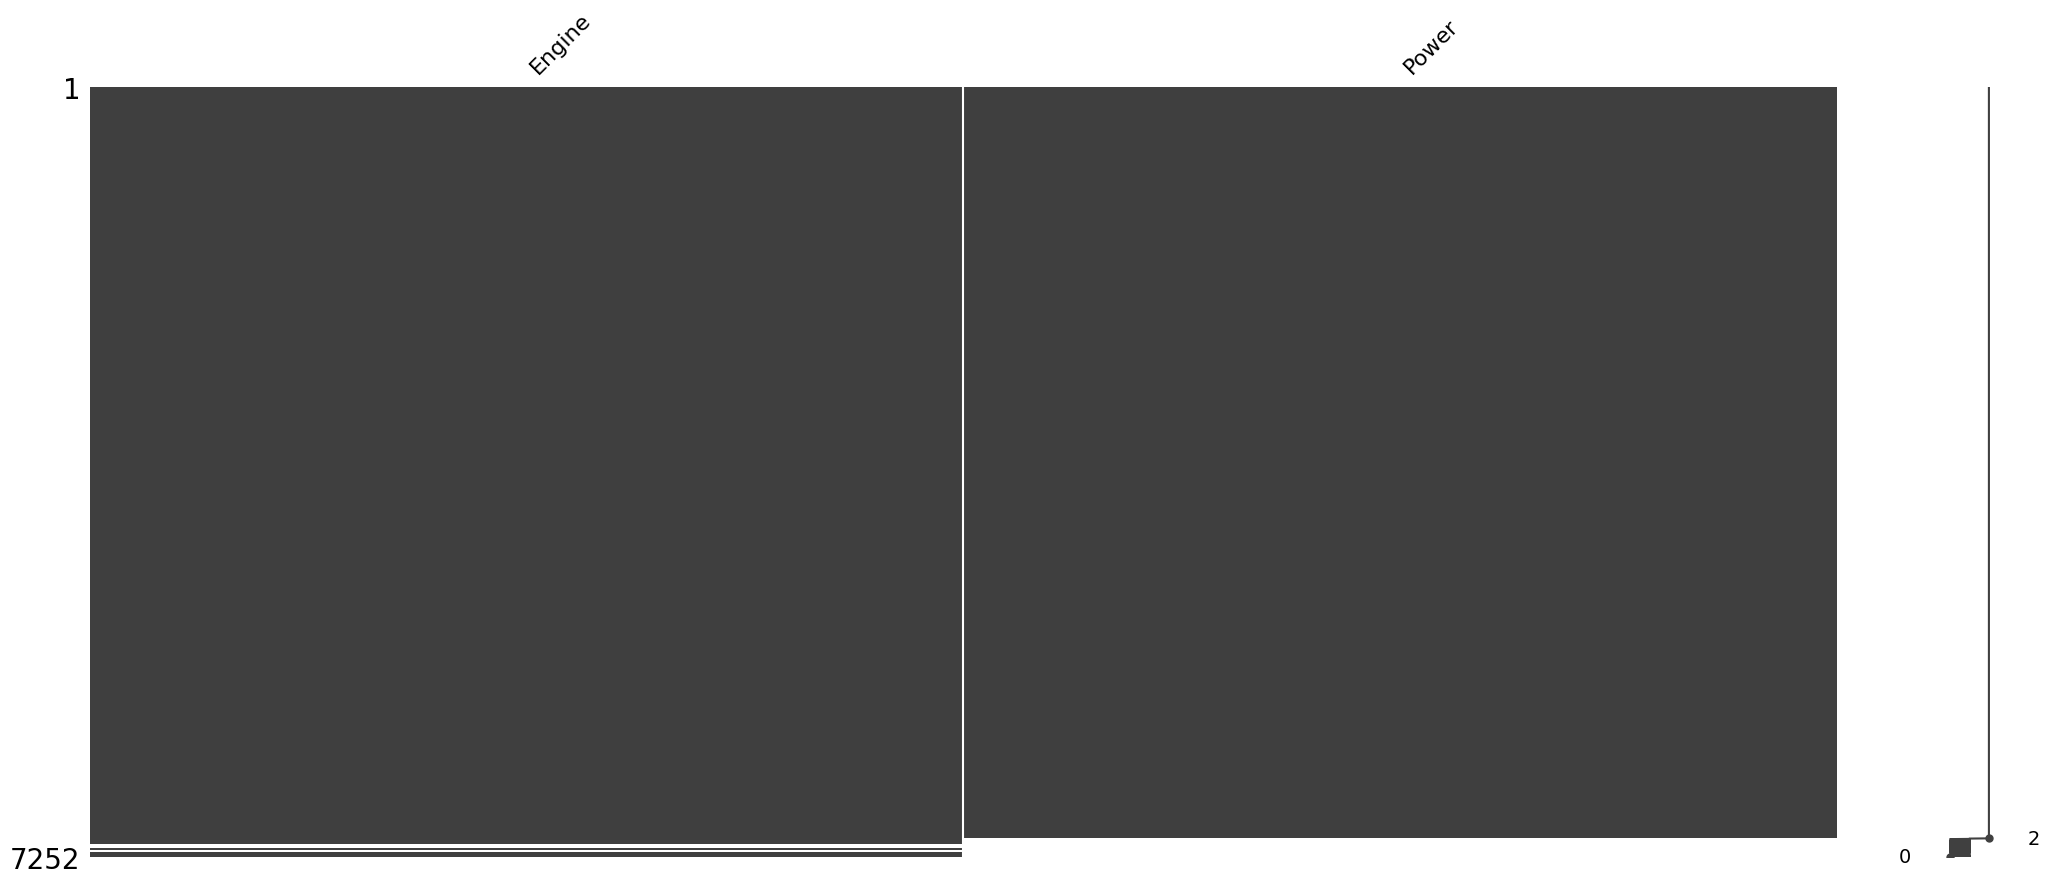

In [420]:
sorted_engine = data[['Engine','Power']].sort_values(by = 'Power')
msno.matrix(sorted_engine)
plt.show()

It appears that the missing values of engine are similar to those with missing values of power. Let's fill those spaces up with the averge engine value for missing power.

In [421]:
data['Engine'] = data['Engine'].fillna(Power_missing['Mileage'].mean())

In [422]:
#Let's check the missing data of Engine 
data['Engine'].isna().sum()

0

### 3. Power

Let's check the stats and compare with Engine 

In [423]:
display(Power_missing.describe())
display(Power_complete.describe())

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
count,175.000000,175.000000,130.000000,129.000000,0.0,125.000000,0.0,143.000000,175.000000,143.000000
mean,2008.708571,76721.011429,17.246846,1389.186047,NaN,5.040000,NaN,4.417203,11.133471,0.988173
std,3.835809,37702.006182,3.334061,506.764873,NaN,0.755624,NaN,6.723963,0.499276,0.877063
min,1996.000000,8000.000000,9.000000,799.000000,NaN,2.000000,NaN,0.550000,8.987197,-0.597837
25%,2006.000000,52573.000000,16.100000,1086.000000,NaN,5.000000,NaN,1.500000,10.869925,0.405465
50%,2009.000000,70000.000000,17.000000,1248.000000,NaN,5.000000,NaN,2.400000,11.156251,0.875469
75%,2012.000000,89500.000000,18.300000,1399.000000,NaN,5.000000,NaN,4.170000,11.401978,1.427775
max,2017.000000,227000.000000,23.590000,3436.000000,NaN,10.000000,NaN,43.000000,12.332705,3.761200


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
count,7077.000000,7077.000000,7039.000000,7077.000000,7077.000000,7074.000000,1006.000000,5875.000000,7077.000000,5875.000000
mean,2013.480006,57343.242617,18.367174,1620.523810,112.744692,5.284705,22.779692,9.593236,10.751071,1.845066
std,3.153023,37376.156747,4.169256,595.821507,53.469461,0.809652,27.759344,11.224235,0.716099,0.863551
min,1998.000000,171.000000,6.400000,72.000000,34.200000,2.000000,3.910000,0.440000,5.141664,-0.820981
25%,2012.000000,33450.000000,15.300000,1198.000000,75.000000,5.000000,7.885000,3.515000,10.417807,1.257039
50%,2014.000000,53000.000000,18.400000,1495.000000,94.000000,5.000000,11.570000,5.750000,10.878047,1.749200
75%,2016.000000,72566.000000,21.100000,1984.000000,138.100000,5.000000,26.042500,10.000000,11.192252,2.302585
max,2019.000000,775000.000000,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000,13.560618,5.075174


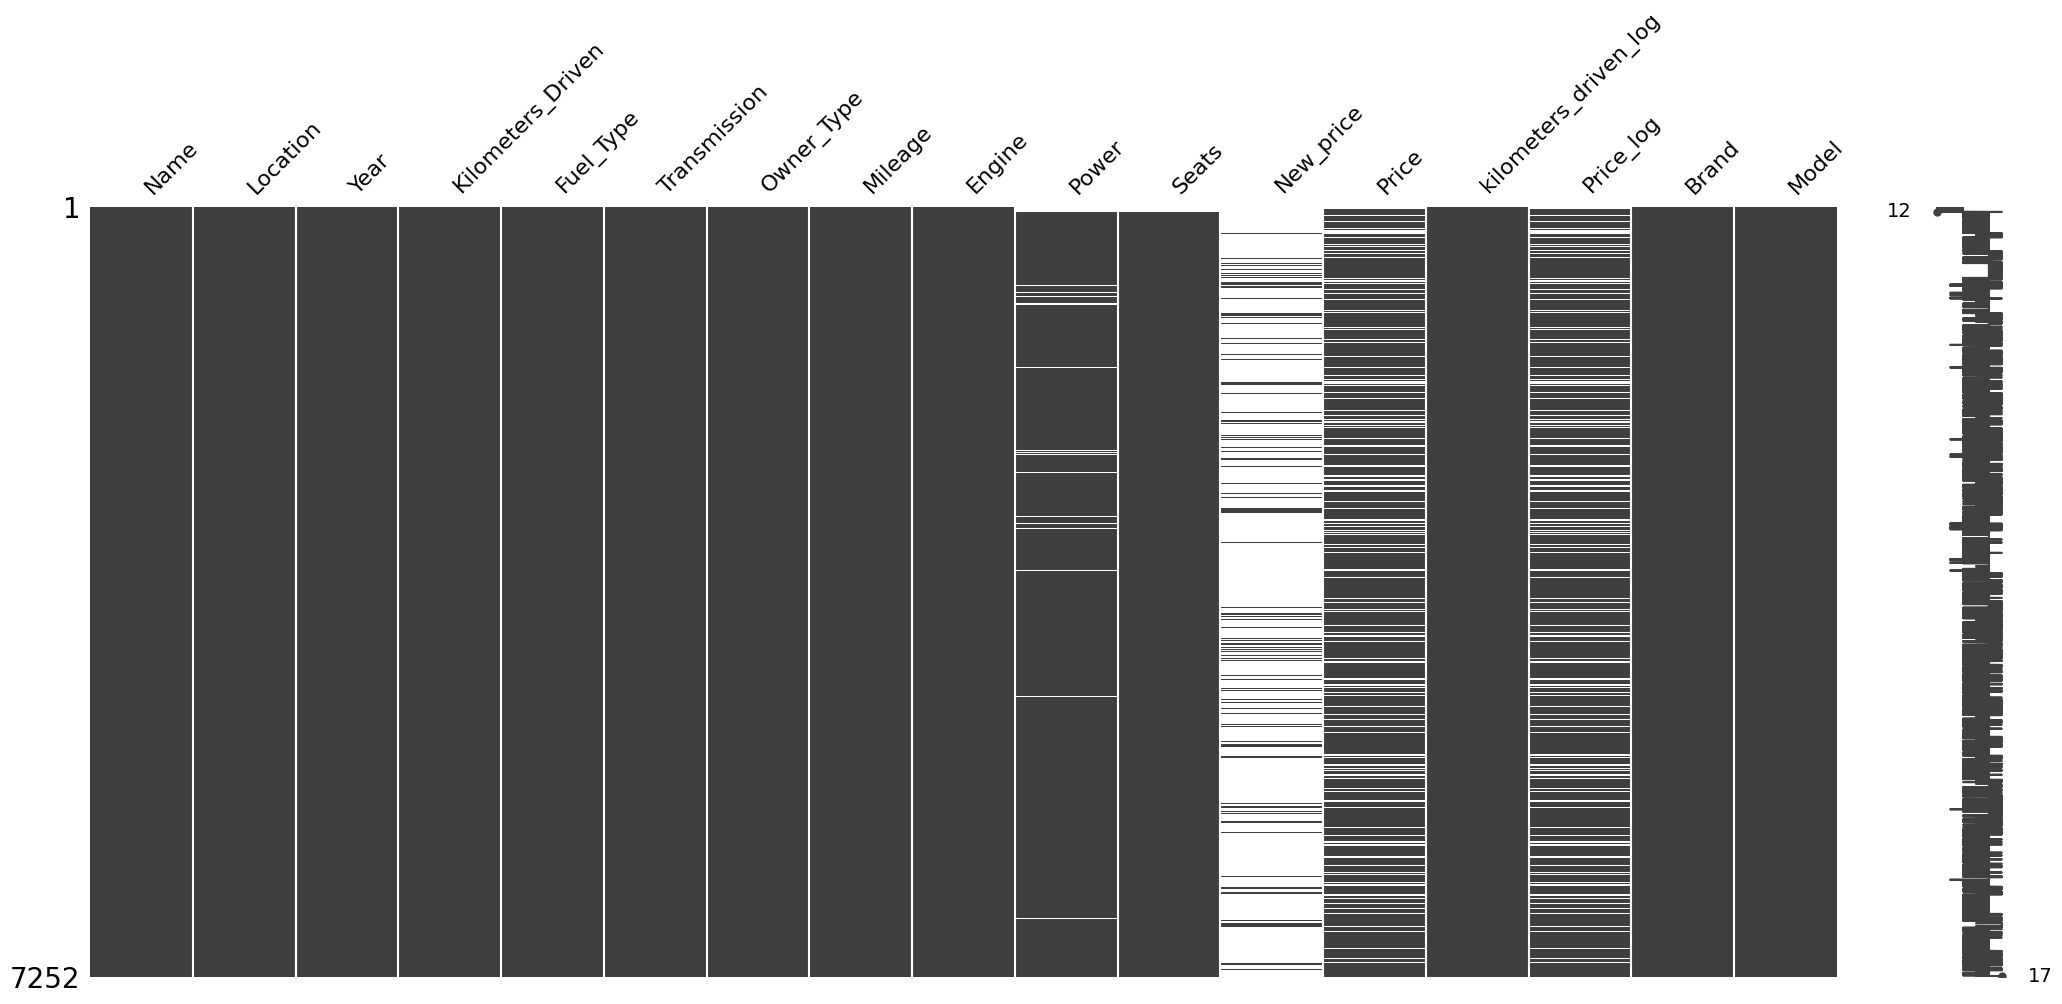

In [424]:
sorted_engine = data.sort_values(by = 'Engine')
msno.matrix(sorted_engine)
plt.show()

It appears there is no clear relationship between the missing values and other variables, so we can just input the median in, since `Power` is highly skewed.

In [425]:
data['Power'] = data['Power'].fillna(data['Power'].median())

In [426]:
#Let's check the missing data of Engine 
data['Power'].isna().sum()

0

### 4. Seats

Let's check if there is any realtionship between the misisng value for seats and other features

In [427]:
display(Seats_missing.describe())
display(Seats_complete.describe())

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
count,53.000000,53.000000,39.000000,7.000000,3.000000,0.0,0.0,42.000000,53.000000,42.000000
mean,2009.867925,68278.735849,16.775641,1475.142857,95.900000,NaN,NaN,6.162619,11.005811,1.294986
std,3.946945,34466.816317,2.307697,680.159400,6.255398,NaN,NaN,8.017630,0.529050,0.952030
min,2001.000000,11574.000000,12.000000,1061.000000,88.700000,NaN,NaN,0.700000,9.356516,-0.356675
25%,2008.000000,50295.000000,16.100000,1061.000000,93.850000,NaN,NaN,1.750000,10.825661,0.559616
50%,2010.000000,63000.000000,16.100000,1199.000000,99.000000,NaN,NaN,3.050000,11.050890,1.114604
75%,2012.000000,81000.000000,18.480000,1495.500000,99.500000,NaN,NaN,5.525000,11.302204,1.705284
max,2019.000000,200000.000000,23.590000,2953.000000,100.000000,NaN,NaN,40.880000,12.206073,3.710641


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
count,7199.000000,7199.000000,7130.000000,7199.000000,7074.000000,7199.000000,1006.000000,5976.000000,7199.000000,5976.000000
mean,2013.390610,57733.786915,18.355453,1616.519794,112.751836,5.280456,22.779692,9.493489,10.758491,1.828428
std,3.235063,37512.326033,4.164428,595.054586,53.479570,0.809327,27.759344,11.181939,0.714935,0.871979
min,1996.000000,171.000000,6.400000,72.000000,34.200000,2.000000,3.910000,0.440000,5.141664,-0.820981
25%,2011.000000,34000.000000,15.300000,1198.000000,75.000000,5.000000,7.885000,3.500000,10.434116,1.252763
50%,2014.000000,53226.000000,18.200000,1493.000000,94.000000,5.000000,11.570000,5.650000,10.882302,1.731656
75%,2016.000000,73000.000000,21.100000,1968.000000,138.100000,5.000000,26.042500,9.952500,11.198215,2.297824
max,2019.000000,775000.000000,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000,13.560618,5.075174


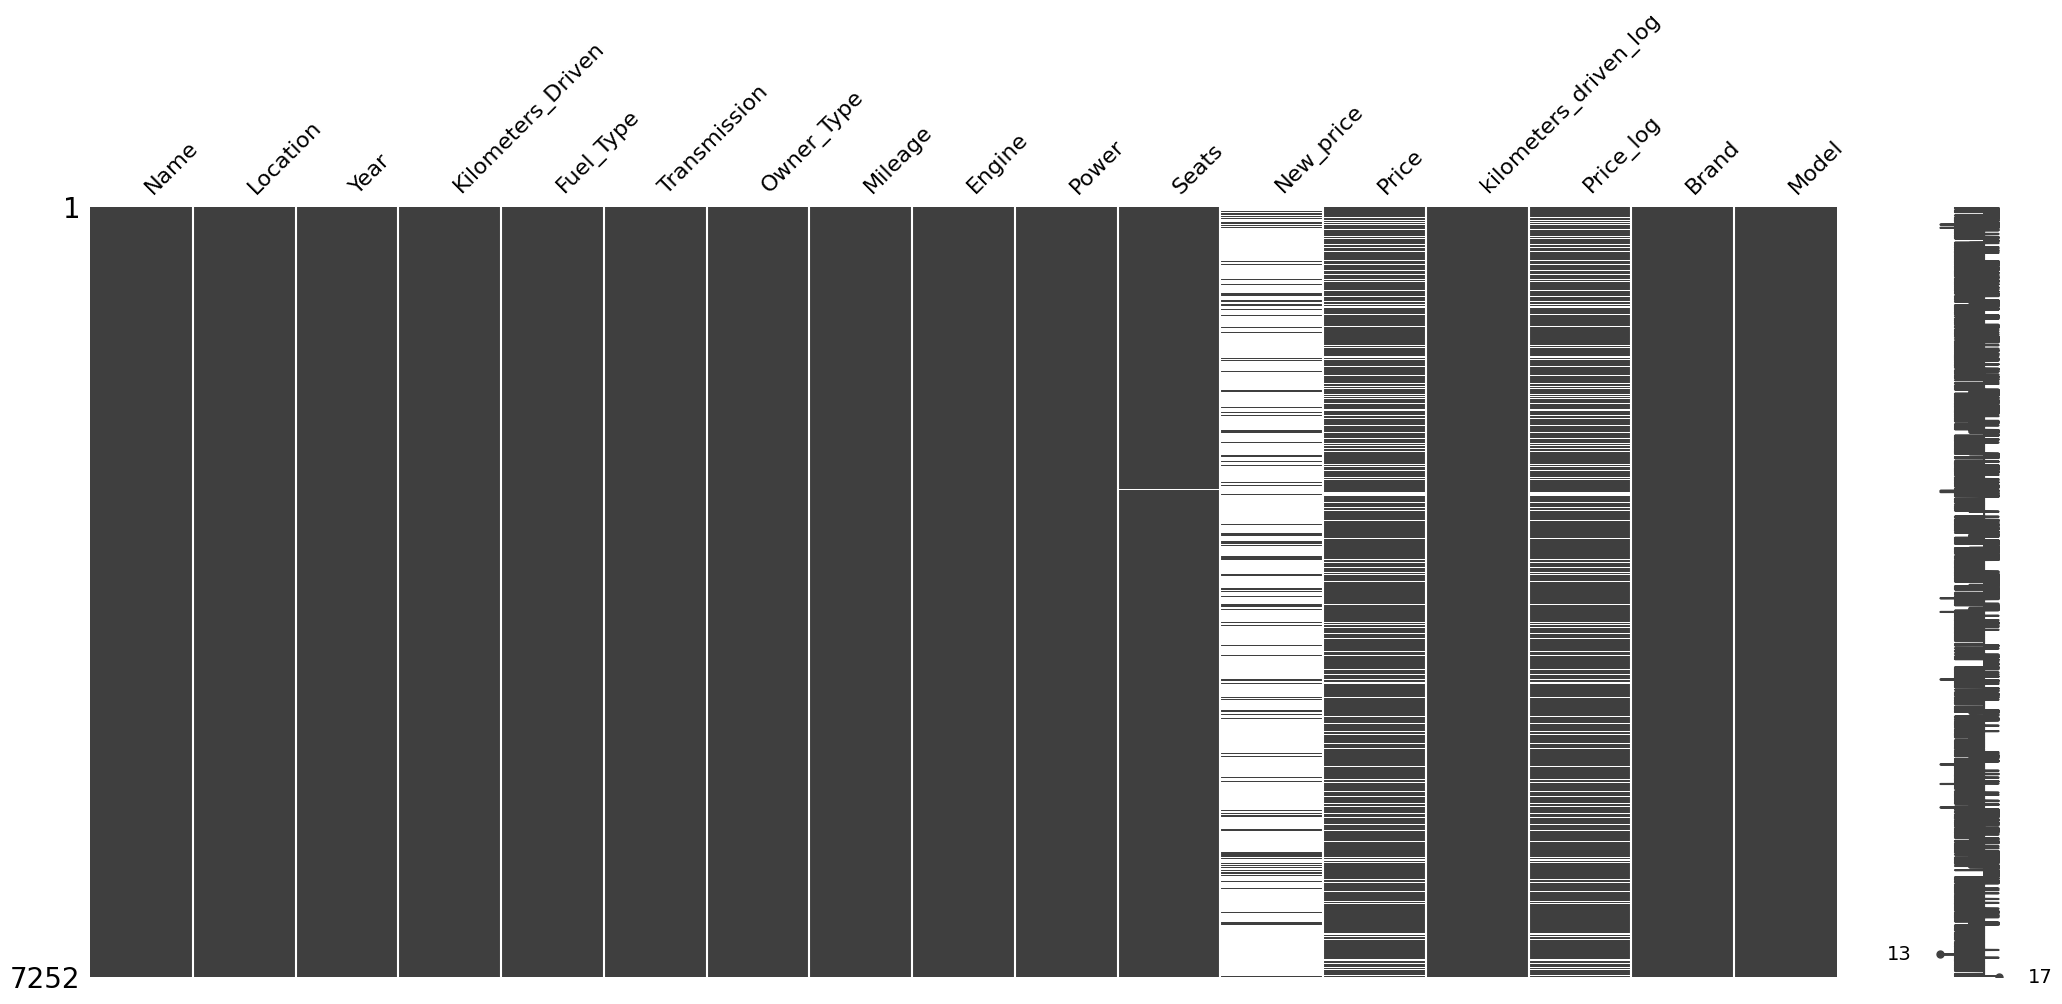

In [428]:
sorted_engine = data.sort_values(by = 'Model')
msno.matrix(sorted_engine)
plt.show()

We can see that the misisng values appear to be in a single model, let's look into this:

In [429]:
missing_seasts = data.groupby('Model')['Seats'].apply(lambda x: x.isna().sum()).reset_index(name='Missing_Values') #gETTING MISISNG VALUES OF SEATS BY MODEL

display(missing_seasts.sort_values(by='Missing_Values',ascending=False).head(16)) #Cropping out the ones above 0

missing_seats_models=missing_seasts.sort_values(by='Missing_Values',ascending=False)['Model'].head(16).tolist() #Turning those models into a list

,Model,Missing_Values
176,Swift,12
166,Santro,7
5,5,7
47,City,5
141,Punto,4
74,Estilo,3
153,Rover,3
75,Etios,3
103,Jazz,2
80,Figo,1


Let's take a look at the median for this models:

In [430]:

data[data['Model'].isin(missing_seats_models)].groupby('Model')['Seats'].median()


Model
5            5.0
CR-V         5.0
City         5.0
Endeavour    7.0
Estilo       NaN
Etios        5.0
Figo         5.0
Jazz         5.0
Laura        5.0
Punto        5.0
Rover        5.0
Santro       5.0
Swift        5.0
TUV          7.0
Wagon        5.0
i20          5.0
Name: Seats, dtype: float64

This is great, we can use these values to imput the missing values of seats for each model. For Estilo model, we can use a quick internet search to find out its value, which happens to be 5. 

In [431]:
# Convert 'Seats' column to numeric (if not already)
data['Seats'] = pd.to_numeric(data['Seats'], errors='coerce')


# Fill missing values in 'Seats' column with the median of each group
data['Seats'] = data.groupby('Model')['Seats'].transform(lambda x: x.fillna(x.median()))


In [432]:
data.isna().sum()


Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       3
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brand                       0
Model                       0
dtype: int64

Great, so now we ae only missing the 3 Na's from Estilo model, let's plug that in and check again:

In [433]:
data['Seats'] = data.apply(lambda row: 5.0 if row['Model'] == 'Estilo' and pd.isna(row['Seats']) else row['Seats'], axis=1)


In [434]:
data.isna().sum()


Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brand                       0
Model                       0
dtype: int64

### 5. Price and New Price

Since this is our objective variable we should drop all rows where there are no values:

In [435]:
data = data.dropna(subset=['Price'])

In [436]:
data.isna().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                5194
Price                       0
kilometers_driven_log       0
Price_log                   0
Brand                       0
Model                       0
dtype: int64

Given the amount of missing information on the `New_price` feature, I believe is inefficient to try and fill the gaps. I will instead drop this column.

In [437]:
data = data.drop(['New_price'],axis=1)

No more missing information now:

In [438]:
data.isna().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
kilometers_driven_log    0
Price_log                0
Brand                    0
Model                    0
dtype: int64

## **Important Insights from EDA and Data Preprocessing**

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

 Name is not useful. Price and price log are response variables. Kilometers driven is not useful since we will use the log so the data is less skewed.

In [439]:
# Drop unwanted variables
X = data.drop(['Name','Price','Price_log','Kilometers_Driven','kilometers_driven_log'], axis = 1)

#Get wanted variables
y = data[["Price_log", "Price"]]

In [447]:
# Get categorical alternatives as dummys 
X = pd.get_dummies(X, drop_first = True)

In [448]:
#Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
print(X_train.shape, X_test.shape)

(4212, 263) (1806, 263)


Let's write a function for evaluation:

In [449]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

### **Hyperparameter Tuning: Linear Regression**

In [450]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
# Create a linear regression model
lr = LinearRegression()
# Fit linear regression model
lr.fit(X_train, y_train['Price_log']) 
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.9366113460909489
R-square on test set :  0.8729653550756615
RMSE on training set :  2.812917745886865
RMSE on test set :  3.972286152221454


This seemes like good intial results. The variations on the independent variables explain over 87% of the variances in the response variable in the test set. 

### **Hyperparameter Tuning: Decision Tree**

In [452]:
# Import Decision tree for Regression from sklearn
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

In [453]:
# Create a decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor on the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_regressor.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 9.18
R-squared: 0.88


We can see that a decision tree has a really good results with an R-squared metric of 0.88, that means that we can explain 85% of teh response variable variations.

Let's check which variables are the most important:

In [484]:
imp_features = pd.DataFrame(dt_regressor.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
print(imp_features.head(10))

                          Imp
Power                0.651523
Year                 0.172744
Mileage              0.037103
Engine               0.036827
Transmission_Manual  0.011869
Location_Bangalore   0.008691
Location_Kochi       0.007344
Model_Rover          0.007031
Seats                0.006326
Location_Hyderabad   0.004704


**Feature Importance**

We can see that Power seems the most important regressor, alongside Year and Engine. We should try to fit a regression and other methods with only this variables to see uf it improves.

### **Hyperparameter Tuning: Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 6.89
R-squared: 0.92


In [ ]:
imp_features_rf = pd.DataFrame(rf_regressor.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)
print(imp_features_rf.head(10))

                          Imp
Power                0.665659
Year                 0.168529
Engine               0.036463
Mileage              0.023212
Seats                0.008326
Transmission_Manual  0.006926
Brand_land           0.006353
Model_Rover          0.005925
Brand_mercedes-benz  0.004841
Brand_porsche        0.003124


**Feature Importance**

We can see that Power, Year and Engine remain being the top features, this is usefull since we can adjust future models to these features. We can also see that the R-squared is really high with 0.92.

In [471]:
X_train2 = X_train[['Power','Year','Engine','Mileage']]

model1 = sm.OLS(y_train['Price_log'],X_train2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_log   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                          1.285e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        21:01:34   Log-Likelihood:                         -3487.3
No. Observations:                4212   AIC:                                      6983.
Df Residuals:                    4208   BIC:                                      7008.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Power          0.0105      0.000     35.106      0.000       0.010       0.011
Year          -0.0004   3.48e-05    -11.280      0.000      -0.000      -0.000
Engine         0.0004   2.81e-05     12.530      0.000       0.000       0.000
Mileage        0.0464      0.003     17.638      0.000       0.041       0.052
==============================================================================
Omnibus:                      604.229   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2014.148
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                       6.068   Cond. No.                         805.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [508]:
from sklearn.metrics import mean_absolute_error
# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Average Error: {mae:.2f}")

Mean Squared Error: 6.89
R-squared: 0.92
Mean Average Error: 0.79


In [483]:
X_train2['Power'] = np.log(X_train2['Power'])

model1 = sm.OLS(y_train['Price_log'],X_train2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_log   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                          1.331e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        22:39:28   Log-Likelihood:                         -3419.2
No. Observations:                4212   AIC:                                      6846.
Df Residuals:                    4208   BIC:                                      6872.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Power          3.5980      0.096     37.569      0.000       3.410       3.786
Year           0.0015   6.16e-05     24.908      0.000       0.001       0.002
Engine         0.0005   2.34e-05     22.818      0.000       0.000       0.001
Mileage        0.0542      0.003     20.830      0.000       0.049       0.059
==============================================================================
Omnibus:                      121.756   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.675
Skew:                          -0.159   Prob(JB):                     9.14e-58
Kurtosis:                       4.181   Cond. No.                     2.98e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Executive summary

Several key findings about the dataa set provided where found:

- The objective variable `Price` was highly skewed and therefore needed to be transfored with a logaritmic function for a better performane of the models. The traansfoormation woulld be used as a new objective variable. 

- Another variable `Kilometers_driven` was also highly skewed, and was also in need of a transformation.

- The `Name` and `Location` variables where of little use, sincce the distribution of them was really skewed and non interpretable or highly uniform.

- Since the data was missing values aa combination of techniques were used to fill out those missing observations.

- Using decision trees and random forest models we could measure which were the mst importaant features for each model, four features came out on top: `Power`, `Year`, `Engine ` and `Mileage`. 

- Detecting these four features, it was pointed out that it would be best to re-train a linear model with those four features in a functional form. The insistaaance of using a linear model comes from teh fact that it is more easily interpretable for someone non-technical, like a cars salesman. 


Now I'll go into details of the proposed model specifications:

Since I saw that the most important features were all numerical, I deided to drop all other variables that were not the four main variables mentioned:


As was visuable in the Milestone, the relationship between `Price_log` and `Power` was not linear, more similar to a logaritmic function. Therefore there will be a linear regression being run between `Price_log` and `Power_log`, `Year`, `Engine`, `Milage`.

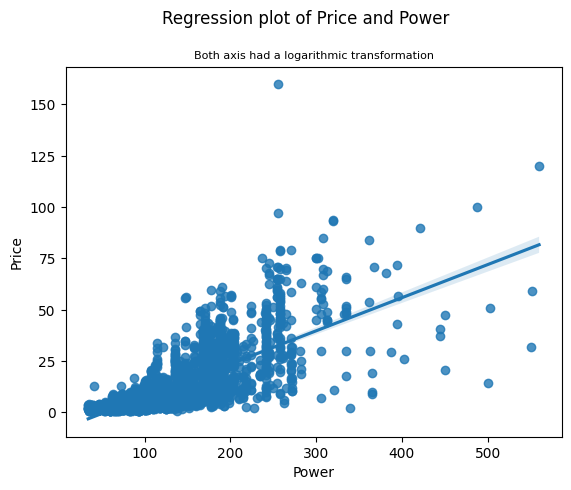

In [502]:
plot = sns.regplot(data=data, x='Power',y='Price')

plot.set_title("Both axis had a logarithmic transformation",fontsize=8)
plt.suptitle("Regression plot of Price and Power", y=1, fontsize=12)

# Show the plot Regression plot of Price and Power
plt.show()

## Problem and solution summary

The problem that was being solved is that there are no clear waay to know the price of a second hand car, multiple factor come into play and it is difficult to distinguish which one come into real weight. To solve this, we analyze the data and run several model to see which facotrs had a better hance of mathing predicted values with real ones, finding out that power was the most relevant. 

The reason to propose the following model is due to its high capacity of explainig the variabillity of the response variable, and its interpretability to the persons who are inside the business at hand.

The solution is to run the next model:

In [482]:
model1 = sm.OLS(y_train['Price_log'],X_train2).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_log   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          1.375e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        22:24:14   Log-Likelihood:                         -3355.5
No. Observations:                4212   AIC:                                      6719.
Df Residuals:                    4208   BIC:                                      6744.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Power          9.8754      0.248     39.798      0.000       9.389      10.362
Year          -0.0020   5.34e-05    -38.146      0.000      -0.002      -0.002
Engine         0.0004   2.43e-05     17.740      0.000       0.000       0.000
Mileage        0.0567      0.003     22.072      0.000       0.052       0.062
==============================================================================
Omnibus:                      157.507   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.286
Skew:                          -0.314   Prob(JB):                     2.03e-59
Kurtosis:                       4.070   Cond. No.                     7.83e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model tells us that for every year older that the car is, the price goes down by 0.2%. Also it tells us that for a inccreease in engine and mileage the price goes up .04%  and 5.67%  respectively. For Power, since we used a logaritmic tranformation, the interpretaation is different. For every 1% rise in Power the price goes up by 9.87%, making it highly important.

This model is simple aandd cana be undertaand by aa salesman, that's one of it's main advantages.

##  Recommendations for implementation

My most important recommendation its to have complete information of the cars that coome at hand, if ever possible. To make sure you now the specifics, specially of the 4 most importnat features.

The salespeope can now know that if they can get a good deaal for a car with good power, they will probablly greatly bnefit from it in the future, since it is highly related with a good price.

Overall, it benefit the aadcquisitons team since they are nos able to look for certain specifics when buying a car to latter sell.

One of the most important insights is that this model relegates the location of the sale, both in social-ecoonomical sense and geographical sense, the ssalespeople should not blindly rely on the model, since it only a tool to estimate the price.